In [1]:
# importing packages

import random as rand
import gender_guesser.detector as gender
import pandas            as pd                      
import matplotlib.pyplot as plt                      
import seaborn           as sns 
import numpy             as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
import statsmodels.formula.api as smf                
from sklearn.metrics import confusion_matrix         
from sklearn.metrics import roc_auc_score            
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.neighbors import KNeighborsRegressor    
from sklearn.preprocessing import StandardScaler     
from sklearn.tree import DecisionTreeClassifier      
from sklearn.tree import plot_tree 
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier


#data
GOT = "./GOT_character_predictions.xlsx"



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

GOT = pd.read_excel(io = GOT, header = 0, sheet_name = 0)


GOT.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [2]:
for column in GOT:
    print (column)

S.No
name
title
culture
dateOfBirth
mother
father
heir
house
spouse
book1_A_Game_Of_Thrones
book2_A_Clash_Of_Kings
book3_A_Storm_Of_Swords
book4_A_Feast_For_Crows
book5_A_Dance_with_Dragons
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
popularity
isAlive


In [3]:
GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [4]:
print(f"""
Original Missing Value Counts:
------------------------------
{GOT.isnull().sum(axis = 0)}""")



Original Missing Value Counts:
------------------------------
S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64


In [5]:
fill = 'no_culture'

GOT['culture'] = GOT['culture'].fillna(value = fill)

fill = 'no_house'

GOT['house'] = GOT['house'].fillna(value = fill)

fill = 'unknown_mother'

GOT['mother'] = GOT['mother'].fillna(value = fill)

fill = 'unknown_father'

GOT['father'] = GOT['father'].fillna(value = fill)

fill = 'no_heir'

GOT['heir'] = GOT['heir'].fillna(value = fill)

fill = 'no_spouse'

GOT['spouse'] = GOT['spouse'].fillna(value = fill)


fill = 'no_title'

GOT['title'] = GOT['title'].fillna(value = fill)


In [6]:
GOT['has_mother']     = 0
GOT['has_father']     = 0
GOT['has_heir']       = 0
GOT['has_spouse']     = 0 
GOT['has_title']      = 0
#GOT['has_isAliveMother/known']= 0
#GOT['has_isAliveFather/known']= 0
#GOT['has_isAliveHeir/known']  = 0
#GOT['has_isAliveSpouse/known']= 0

for index, value in GOT.iterrows():
    
    if GOT.loc[index,'mother'] != "unknown_mother":
        GOT.loc[index, 'has_mother'] = 1
        
    if GOT.loc[index,'father'] != "unknown_father":
        GOT.loc[index, 'has_father'] = 1
        
    if GOT.loc[index,'heir'] != "no_heir":
        GOT.loc[index, 'has_heir'] = 1
        
    if GOT.loc[index,'spouse'] != "no_spouse":
        GOT.loc[index, 'has_spouse'] = 1
        
    if GOT.loc[index,'title'] != "no_title":
        GOT.loc[index, 'has_title'] = 1
        
    if GOT.loc[index,'isAliveMother'] == 1:
        GOT.loc[index, 'has_isAliveMother'] = 1
        
    elif GOT.loc[index,'isAliveMother'] == 0:
        GOT.loc[index, 'has_isAliveMother'] = 0
    else:
        GOT.loc[index,'has_isAliveMother'] = 0
        
        
    if GOT.loc[index,'isAliveFather'] == 1:
        GOT.loc[index, 'has_isAliveFather'] = 1
        
    elif GOT.loc[index,'isAliveFather'] == 0:
        GOT.loc[index, 'has_isAliveFather'] = 0
    else:
        GOT.loc[index,'has_isAliveFather'] = 0
        
        
    if GOT.loc[index,'isAliveHeir'] == 1:
        GOT.loc[index, 'has_isAliveHeir'] = 1
        
    elif GOT.loc[index,'isAliveHeir'] == 0:
        GOT.loc[index, 'has_isAliveHeir'] = 0
    else:
        GOT.loc[index,'has_isAliveHeir'] = 0
                
    if GOT.loc[index,'isAliveSpouse'] == 1:
        GOT.loc[index, 'has_isAliveSpouse'] = 1
        
    elif GOT.loc[index,'isAliveSpouse'] == 0:
        GOT.loc[index, 'has_isAliveSpouse'] = 0
    else:
        GOT.loc[index,'has_isAliveSpouse'] = 0
        



        
        
fill= GOT['age'].median()
GOT['age'] = GOT['age'].fillna(value=fill)

fill=GOT['dateOfBirth'].median()
GOT['dateOfBirth'] = GOT['dateOfBirth'].fillna(value=fill)


GOT_new=GOT      
GOT_new.head(n=5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,has_mother,has_father,has_heir,has_spouse,has_title,has_isAliveMother,has_isAliveFather,has_isAliveHeir,has_isAliveSpouse
0,1,Viserys II Targaryen,no_title,no_culture,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,no_house,no_spouse,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,27.0,11,0.605351,0,1,1,1,0,0,1.0,0.0,0.0,0.0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown_mother,unknown_father,no_heir,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,0.0,0.0,0.0,1.0
2,3,Addison Hill,Ser,no_culture,268.0,unknown_mother,unknown_father,no_heir,House Swyft,no_spouse,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,27.0,0,0.267559,1,0,0,0,0,1,0.0,0.0,0.0,0.0
3,4,Aemma Arryn,Queen,no_culture,82.0,unknown_mother,unknown_father,no_heir,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,0,0,1,1,0.0,0.0,0.0,0.0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown_mother,unknown_father,no_heir,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,0.0,0.0,0.0,1.0


In [7]:
GOT_corr= GOT_new.corr().round(decimals=2) 

print(GOT_corr.loc['isAlive'].sort_values(ascending = False))

isAlive                       1.00
isAliveHeir                   0.38
book4_A_Feast_For_Crows       0.27
isAliveFather                 0.20
isAliveSpouse                 0.17
age                           0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
has_isAliveSpouse            -0.01
isAliveMother                -0.04
isNoble                      -0.04
has_isAliveFather            -0.04
has_title                    -0.04
has_spouse                   -0.05
isMarried                    -0.05
dateOfBirth                  -0.05
book2_A_Clash_Of_Kings       -0.07
has_isAliveHeir              -0.08
has_isAliveMother            -0.12
S.No                         -0.13
has_heir                     -0.13
has_father                   -0.14
has_mother                   -0.14
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64


In [8]:
# setting random seed
rand.seed(a = 327)



placeholder_lst = []


for index, col in GOT_new.iterrows():
   
    
    split_name = GOT_new.loc[index, 'name'].split(sep = ' ')
   
    
    placeholder_lst.append(split_name)
   

# converting placeholder_lst into a DataFrame
names = pd.DataFrame(placeholder_lst)


names

,0,1,2,3,4,5
0,Viserys,II,Targaryen,None,None,None
1,Walder,Frey,None,None,None,None
2,Addison,Hill,None,None,None,None
3,Aemma,Arryn,None,None,None,None
4,Sylva,Santagar,None,None,None,None
...,...,...,...,...,...,...
1941,Luwin,None,None,None,None,None
1942,Reek,None,None,None,None,None
1943,Symeon,Star-Eyes,None,None,None,None
1944,Coldhands,None,None,None,None,None


In [9]:
# optimal_neighbors

def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    training_accuracy = []
    test_accuracy = []
    
    
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
 
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
    
        training_accuracy.append(clf.score(x_train, y_train))

        test_accuracy.append(clf.score(x_test, y_test))


    if show_viz == True:
        
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
 
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
   
    lbls = labels
    

    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()



In [10]:
GOT_new.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [11]:
GOT_new_data = GOT_new.drop('isAlive', axis = 1)

GOT_new_target = GOT_new.loc[ : , 'isAlive']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
            GOT_new_data,
            GOT_new_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_new_target) 



GOT_new_train = pd.concat([X_train, y_train], axis = 1)

In [53]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [54]:
logistic_small = smf.logit(formula   = """isAlive ~ book1_A_Game_Of_Thrones""",
                           data      = GOT_new_train)


results_logistic = logistic_small.fit()


results_logistic.summary2()

Optimization terminated successfully.
         Current function value: 0.559485
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.013     
Dependent Variable:   isAlive            AIC:                1963.3178 
Date:                 2021-12-05 21:48   BIC:                1974.2537 
No. Observations:     1751               Log-Likelihood:     -979.66   
Df Model:             1                  LL-Null:            -992.53   
Df Residuals:         1749               LLR p-value:        3.8858e-07
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.2209   0.0633 19.2812 0.0000  1.0968  1.3450
book1_A_Game_Of_Thrones -0.6730   0.1302 -5.1702 0.0000 -0.9282 -0.4179
=======================================================================

"""

In [15]:
for val in GOT_new_data:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 has_mother + 
 has_father + 
 has_heir + 
 has_spouse + 
 has_title + 
 has_isAliveMother + 
 has_isAliveFather + 
 has_isAliveHeir + 
 has_isAliveSpouse + 


In [16]:
logistic_full = smf.logit(formula = """ isAlive ~ 
   
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons+
 age +
 popularity""",
 data    = GOT_new_train)



results_full = logistic_full.fit()



results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.501613
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.115     
Dependent Variable:    isAlive             AIC:                 1477.7062 
Date:                  2021-12-05 21:18    BIC:                 1514.7048 
No. Observations:      1459                Log-Likelihood:      -731.85   
Df Model:              6                   LL-Null:             -827.24   
Df Residuals:          1452                LLR p-value:         1.7383e-38
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        9.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                   0.8263   0.1021  8.0934 0.0000  0.6262  1.0264
book2_A_Clash_Of_Kings     -0.4230   0.1478 -2.8623 0.0042 -0.7126 -0.1333
book3_A_Storm_Of_Swords    -0.3177   0.1562 -2.0342 0.0419 -0.6239 -0.0116
book4_A_Feast_For_Crows     1.6625   0.1599 10.3953 0.0000  1.3490  1.9759
book5_A_Dance_with_Dragons -0.0710   0.1498 -0.4740 0.6355 -0.3646  0.2226
age                         0.0000   0.0001  0.4634 0.6431 -0.0001  0.0001
popularity                 -2.7339   0.4058 -6.7363 0.0000 -3.5294 -1.9385
==========================================================================

"""

In [55]:
candidate_dict = {

 # full model
 'logit_full'   : ['age', 'dateOfBirth', 'isAliveMother', 'isAliveFather',
                   'isAliveHeir', 'isAliveSpouse', 'isMarried', 
                   'numDeadRelations','popularity', 'isAlive', 'isNoble'],
 

 # significant (set 1)
 'logit_sig'    : ['book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings', 
                   'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows',
                   'book5_A_Dance_with_Dragons', 'has_heir', 'has_father'],
    
    
 # significant (set 2)
 'logit_sig2'  : ['book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings', 
                   'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows',
                   'book5_A_Dance_with_Dragons', 'has_heir', 'has_father', 'age',
                   'popularity']

}

In [56]:
GOT_new_data   =  GOT_new.loc[ : , candidate_dict['logit_sig2']]
GOT_new_target =  GOT_new.loc[ : , "isAlive"]


X_train, X_test, y_train, y_test = train_test_split(
            GOT_new_data,
            GOT_new_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_new_target)


# logistic regression
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)



logreg_fit = logreg.fit(X_train, y_train)


logreg_pred = logreg_fit.predict(X_test)



print('LogReg Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))



logreg_train_score = logreg_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(X_test, y_test).round(4) # accuracy

print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7579
LogReg Testing  ACCURACY: 0.8103
LogReg Train-Test Gap   : 0.0524


In [20]:
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))



logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6431


In [21]:
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
   
    n_features = x_train.shape[1]
    
   
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [57]:
full_tree = DecisionTreeClassifier()


full_tree_fit = full_tree.fit(X_train, y_train)


full_tree_pred = full_tree_fit.predict(X_test)



print('Full Tree Training ACCURACY:', full_tree_fit.score(X_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(X_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))



full_tree_train_score = full_tree_fit.score(X_train, y_train).round(4) 
full_tree_test_score  = full_tree_fit.score(X_test, y_test).round(4)  



full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4)

Full Tree Training ACCURACY: 0.916
Full Tree Testing ACCURACY : 0.7692
Full Tree AUC Score: 0.7072


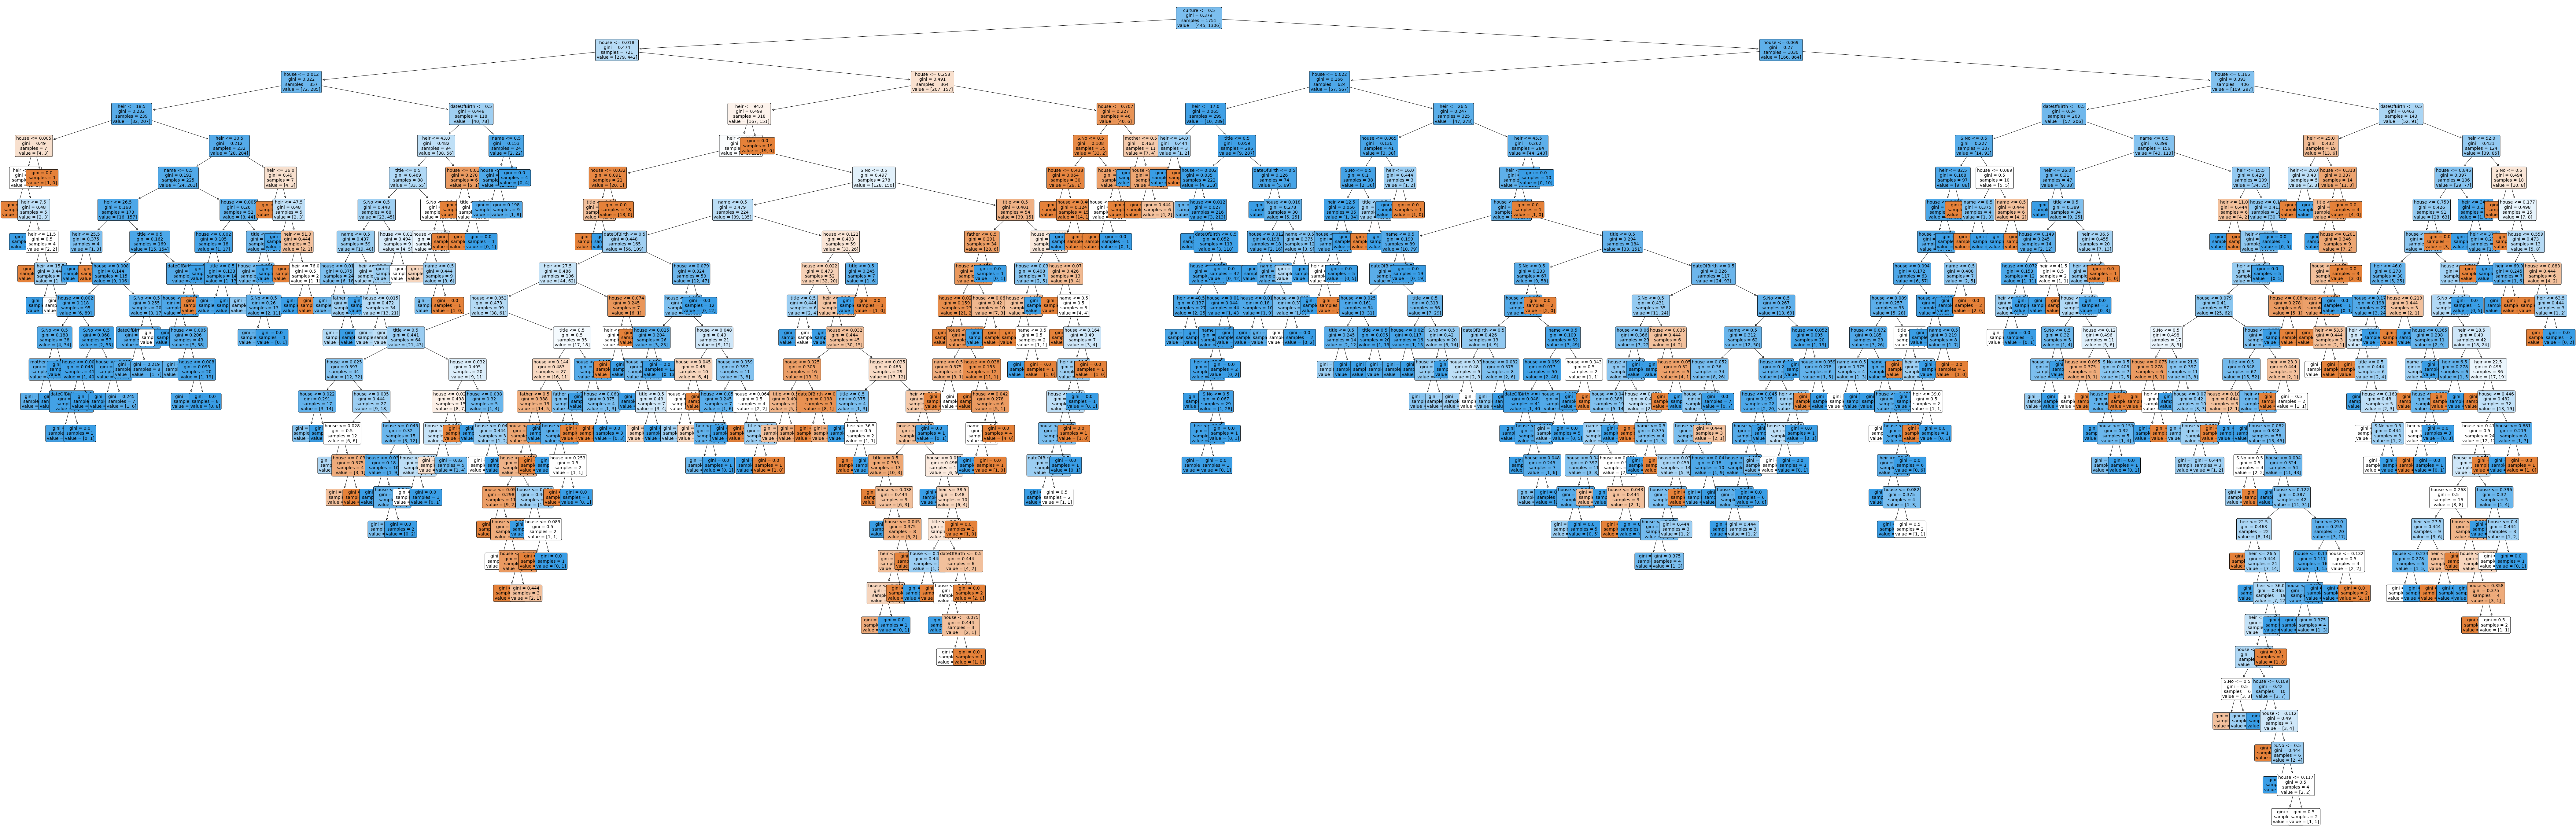

In [23]:
plt.figure(figsize=(150,50))



plot_tree(decision_tree = full_tree_fit, 
          feature_names = GOT_new.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)



plt.show()

In [58]:
tree_pruned = DecisionTreeClassifier(max_depth = 3,
                    min_samples_leaf = 25,
                    random_state = 219)



tree_pruned_fit = tree_pruned.fit(X_train, y_train)



pruned_tree_pred = tree_pruned_fit.predict(X_test)



print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))



pruned_tree_train_score = tree_pruned_fit.score(X_train, y_train).round(4)
pruned_tree_test_score  = tree_pruned_fit.score(X_test, y_test).round(4) 



pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) 

Training ACCURACY: 0.7744
Testing  ACCURACY: 0.8462
AUC Score        : 0.7721


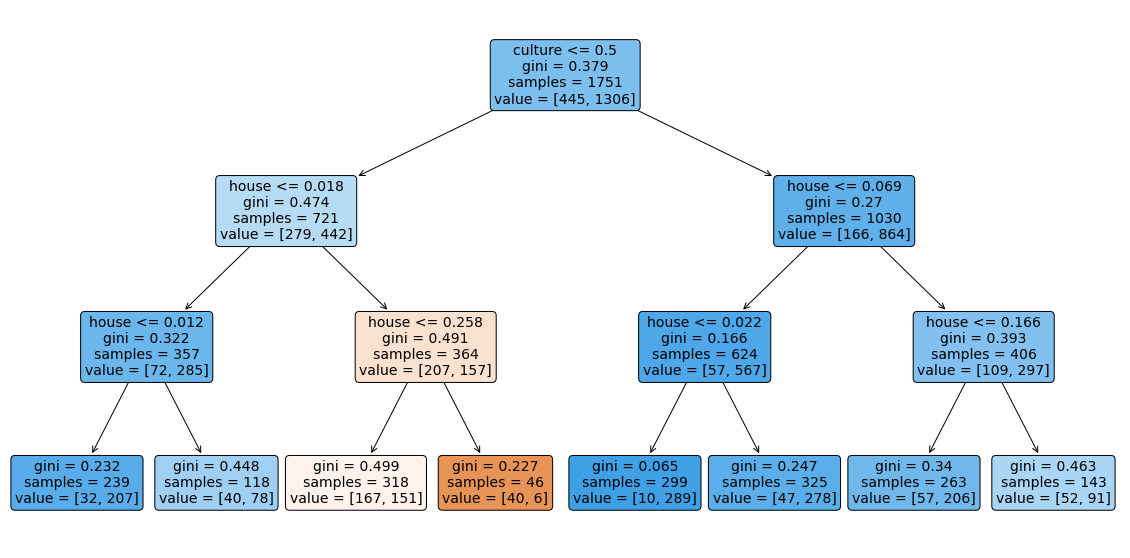

In [25]:
plt.figure(figsize=(20, 10)) 



plot_tree(decision_tree = tree_pruned_fit,
          feature_names = GOT_new.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)



plt.show()

In [26]:
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 15  35]
 [  2 143]]


In [27]:
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()



print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 15
False Positives: 35
False Negatives: 2
True Positives : 143



In [28]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 31
False Positives: 19
False Negatives: 25
True Positives : 120



In [29]:
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()



print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 31
False Positives: 19
False Negatives: 11
True Positives : 134



In [30]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")



model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}



model_performance = pd.DataFrame(model_performance)




Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6431         (15, 35, 2, 143)
Full Tree     0.7238         (31, 19, 25, 120)
Pruned Tree   0.7721         (31, 19, 11, 134)



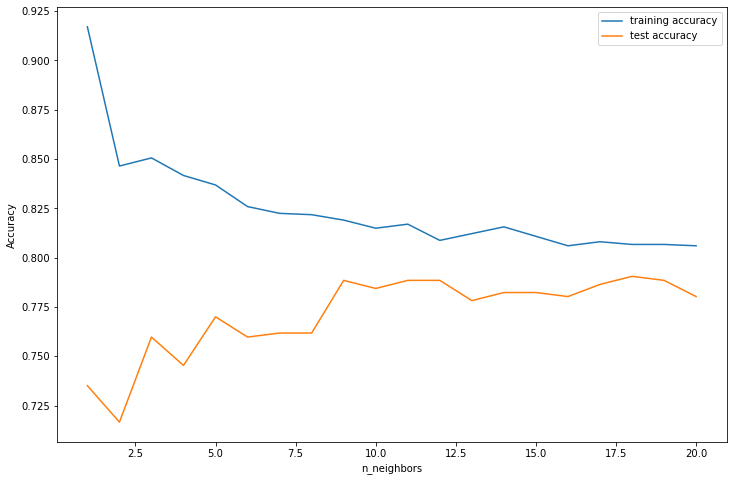

The optimal number of neighbors is: 18


In [31]:
opt_neighbors = optimal_neighbors(x_data        = GOT_new_data,
                                  y_data        = GOT_new_target,
                                  response_type = 'class')

In [32]:
scaler = StandardScaler()

scaler.fit(GOT_new_data)

X_scaled     = scaler.transform(GOT_new_data)

X_scaled_df  = pd.DataFrame(X_scaled) 

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            GOT_new_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_new_target)


#KNN classification 
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)

knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)

knn_pred = knn_fit.predict(X_test_scaled)

print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


knn_train_score = knn_fit.score(X_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


#AUC
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8007
Testing  ACCURACY: 0.8051
AUC Score        : 0.6921


In [33]:
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 31
False Positives: 19
False Negatives: 11
True Positives : 134



In [34]:
# logit_sig variables
GOT_new_data   =  GOT_new.loc[ :, candidate_dict['logit_sig']]
GOT_new_target =  GOT_new.loc[ :,'isAlive']



X_train, X_test, y_train, y_test = train_test_split(GOT_new_data,
                                                    GOT_new_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_new_target)

In [35]:
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [36]:
lr_default_fit = lr_default.fit(X_train, y_train)


lr_default_pred = lr_default_fit.predict(X_test)


print('Training ACCURACY:', lr_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(X_test, y_test).round(4))


print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))

logreg_train_score = lr_default_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(X_test, y_test).round(4)   # accuracy


logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7607
Testing  ACCURACY: 0.8051
AUC Score        : 0.6266


In [37]:
#hyperparameter
C_range          = np.arange(0.1, 5.0, 0.1)
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   
                                 param_distributions = param_grid, 
                                 cv                  = 3,          
                                 n_iter              = 250,        
                                 random_state        = 219,       
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) 


lr_tuned_cv.fit(GOT_new_data, GOT_new_target)



print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 3.9000000000000004}
Tuned CV AUC      : 0.5612


In [38]:
lr_tuned_cv.cv_results_

{'mean_fit_time': array([0.00625594, 0.01252516, 0.0068806 , 0.00621986, 0.00480056,
        0.01079774, 0.0048147 , 0.00868726, 0.00478228, 0.0049332 ,
        0.00664361, 0.0077587 , 0.00491365, 0.00475136, 0.00869624,
        0.00372132, 0.00485635, 0.00583037, 0.00425728, 0.00674939,
        0.004632  , 0.00490189, 0.00610717, 0.00454609, 0.00610868,
        0.00444539, 0.0044624 , 0.00488011, 0.00391245, 0.00667294,
        0.00405995, 0.00488861, 0.0064373 , 0.00679064, 0.00655699,
        0.00635274, 0.00608238, 0.00621136, 0.00437172, 0.00502038,
        0.00660872, 0.00516629, 0.00308696, 0.0044473 , 0.00574327,
        0.0058217 , 0.00538158, 0.00420602, 0.00479015, 0.00535432,
        0.00467356, 0.00430822, 0.00422494, 0.00453568, 0.01007501,
        0.00487979, 0.00580366, 0.00452892, 0.00647457, 0.00648697,
        0.00605234, 0.00450587, 0.00390005, 0.00636625, 0.00475661,
        0.00791009, 0.00524894, 0.00377393, 0.00487256, 0.00422557,
        0.00457382, 0.00624919,

In [39]:
lr_tuned_cv.best_estimator_

LogisticRegression(C=3.9000000000000004, max_iter=1000, random_state=219,
                   solver='newton-cg', warm_start=True)

In [40]:
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [41]:
rf_default_fit = rf_default.fit(X_train, y_train)

rf_default_fit_pred = rf_default_fit.predict(X_test)

print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))

print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.7698
Testing  ACCURACY: 0.7692
AUC Score        : 0.5697


In [42]:
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 8
False Positives: 42
False Negatives: 3
True Positives : 142



In [43]:
rf_train_acc = rf_default_fit.score(X_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)

model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)

model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6431,0.7579,0.8103,"(15, 35, 2, 143)"
1,Full Tree,0.7238,0.9160,0.7744,"(31, 19, 25, 120)"
2,Pruned Tree,0.7721,0.7744,0.8462,"(31, 19, 11, 134)"
3,Random Forest (Full),0.5697,0.7698,0.7692,"(8, 42, 3, 142)"


In [47]:
rf_default_fit = rf_default.fit(X_train, y_train)

rf_default_fit_pred = rf_default_fit.predict(X_test)


estimator_range  = np.arange(100, 1100, 250)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}

forest_grid = RandomForestClassifier(random_state = 219)


forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


forest_cv.fit(GOT_new_data, GOT_new_target)


print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.5805


In [59]:
#hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


full_gbm_default_fit = full_gbm_default.fit(X_train, y_train)

full_gbm_default_pred = full_gbm_default_fit.predict(X_test)


print('Training ACCURACY:', full_gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8327
Testing ACCURACY : 0.8513
AUC Score        : 0.7493


In [45]:
#GBM
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 16
False Positives: 34
False Negatives: 1
True Positives : 144



In [46]:
gbm_train_acc = full_gbm_default_fit.score(X_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6431,0.7579,0.8103,"(15, 35, 2, 143)"
1,Full Tree,0.7238,0.9160,0.7744,"(31, 19, 25, 120)"
2,Pruned Tree,0.7721,0.7744,0.8462,"(31, 19, 11, 134)"
3,Random Forest (Full),0.5697,0.7698,0.7692,"(8, 42, 3, 142)"
4,GBM (Full),0.6566,0.7653,0.8205,"(16, 34, 1, 144)"


In [47]:
learn_range        = np.arange(0.1, 2.2, 0.5)
estimator_range    = np.arange(100, 501, 25)
depth_range        = np.arange(2, 11, 2)
warm_start_range   = [True, False]

param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


full_gbm_grid = GradientBoostingClassifier(random_state = 219)


full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 500,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


full_gbm_cv.fit(GOT_new_data, GOT_new_target)



print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 1.1}
Tuned Training AUC: 0.5819


In [48]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 2,
                                       n_estimators  = 200,
                                       warm_start    = True,
                                       random_state  = 219)



gbm_tuned_fit = gbm_tuned.fit(GOT_new_data, GOT_new_target)



gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7556
Testing  ACCURACY: 0.8154
AUC Score        : 0.6662


In [49]:
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 18
False Positives: 32
False Negatives: 4
True Positives : 141



In [50]:
gbm_train_acc = gbm_tuned_fit.score(X_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6431,0.7579,0.8103,"(15, 35, 2, 143)"
1,Full Tree,0.7238,0.9160,0.7744,"(31, 19, 25, 120)"
2,Pruned Tree,0.7721,0.7744,0.8462,"(31, 19, 11, 134)"
3,Random Forest (Full),0.5697,0.7698,0.7692,"(8, 42, 3, 142)"
4,GBM (Full),0.6566,0.7653,0.8205,"(16, 34, 1, 144)"
5,Tuned GBM,0.6662,0.7556,0.8154,"(18, 32, 4, 141)"


In [51]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
2,Pruned Tree,0.7721,0.7744,0.8462,"(31, 19, 11, 134)"
1,Full Tree,0.7238,0.9160,0.7744,"(31, 19, 25, 120)"
5,Tuned GBM,0.6662,0.7556,0.8154,"(18, 32, 4, 141)"
4,GBM (Full),0.6566,0.7653,0.8205,"(16, 34, 1, 144)"
0,Logistic,0.6431,0.7579,0.8103,"(15, 35, 2, 143)"
3,Random Forest (Full),0.5697,0.7698,0.7692,"(8, 42, 3, 142)"


In [63]:
# comparing results

print(f"""
Model      AUC Score      Test Score
-----      -----------      ----------
Pruned Tree*        {roc_auc_score(y_true  = y_test,y_score = full_gbm_default_pred).round(4)}          
* = final model""")


           
 





Model      AUC Score      Test Score
-----      -----------      ----------
Pruned Tree*        0.7493          
* = final model
